#Movies and Series Recommendation system

Import Relevant Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

loading dataset

In [ ]:
train_df = pd.read_csv("/content/netflix_titles.csv")

Understanding the data

In [ ]:
train_df.shape


(8807, 12)

In [ ]:
train_df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
train_df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
train_df.describe()


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
train_df.describe(include='object')


,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [ ]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Performing exploratory Data Analysis (EDA) and Feature Engineering


In [ ]:
data = train_df.copy()


In [ ]:
data.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
from dateutil import parser
data['date_added'] = data['date_added'].apply(lambda x: parser.parse(x, fuzzy=True) if pd.notnull(x) else None)

In [ ]:
data.dtypes


show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [ ]:
data['data_added_day'] = data['date_added'].dt.day
data['data_added_month'] = data['date_added'].dt.month
data['data_added_year'] = data['date_added'].dt.year
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,data_added_day,data_added_month,data_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24.0,9.0,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24.0,9.0,2021.0


In [ ]:
data.drop(['date_added'], axis=1, inplace=True)


In [ ]:
data.head()


,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,data_added_day,data_added_month,data_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24.0,9.0,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24.0,9.0,2021.0


In [ ]:
data.dtypes


show_id              object
type                 object
title                object
director             object
cast                 object
country              object
release_year          int64
rating               object
duration             object
listed_in            object
description          object
data_added_day      float64
data_added_month    float64
data_added_year     float64
dtype: object

Visualizing Target Feature 'Type'




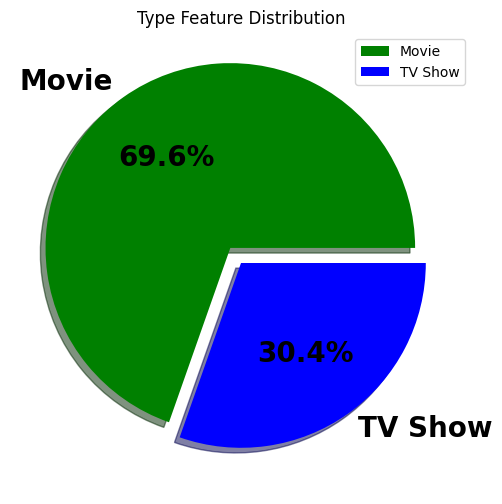

In [ ]:
plt.figure(figsize=(10, 6))
plt.pie(data['type'].value_counts(), labels=data['type'].value_counts().keys(), explode=[0.1,0.0],autopct='%1.1f%%', textprops={'fontsize': 20, 'fontweight': 'bold'}, colors=['g', 'b'], shadow=True)
plt.title('Type Feature Distribution')
plt.legend(loc = 1)
plt.show()

Identifying the unique show Ids

There are 8807 unique show IDs.


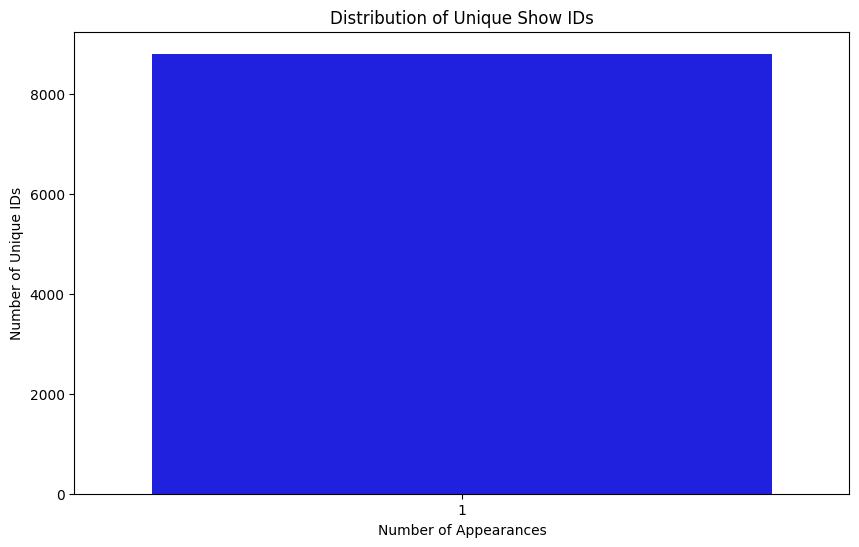

In [ ]:
unique_show_ids = data['show_id'].nunique()
print(f"There are {unique_show_ids} unique show IDs.")

# Plot a count plot for the unique show IDs
show_id_counts = data['show_id'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(x=show_id_counts.values, color='blue')
plt.xlabel('Number of Appearances')
plt.ylabel('Number of Unique IDs')
plt.title('Distribution of Unique Show IDs')
plt.show()

Identifying the top 10 most common titles

In [ ]:
top_titles = data['title'].value_counts().head(10)
print("Top 10 most common titles:")
print(top_titles)

Top 10 most common titles:
Dick Johnson Is Dead                1
Ip Man 2                            1
Hannibal Buress: Comedy Camisado    1
Turbo FAST                          1
Masha's Tales                       1
Chelsea Does                        1
Ricardo O'Farrill Abrazo Genial     1
Ip Man                              1
Tom Segura: Mostly Stories          1
Team Foxcatcher                     1
Name: title, dtype: int64


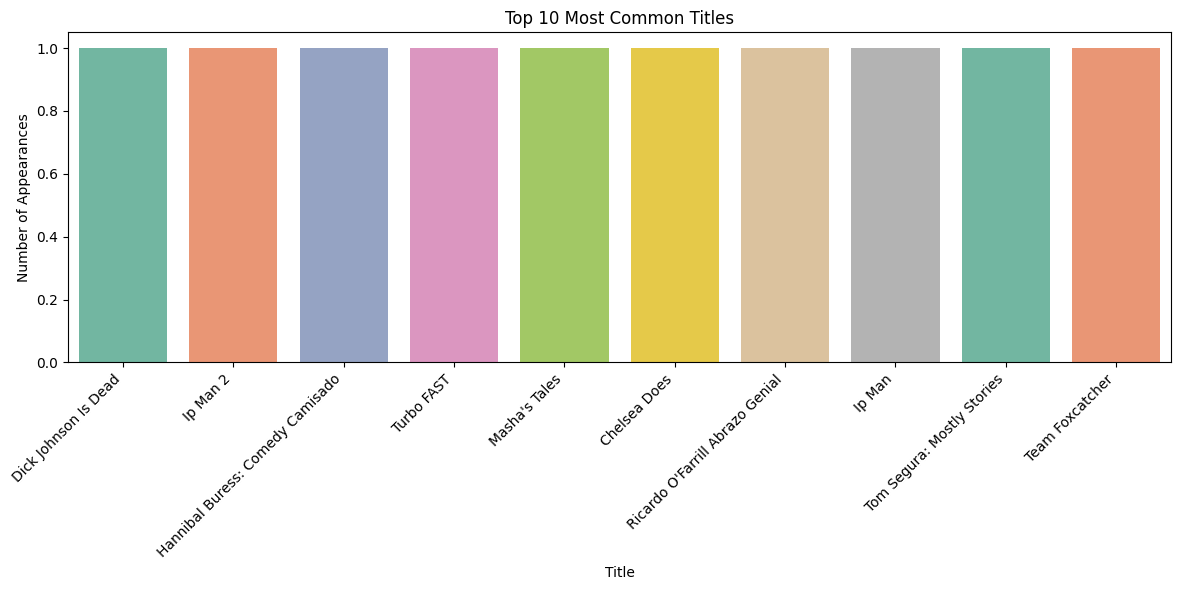

In [ ]:
# Plot a bar plot for the top 10 most common titles
plt.figure(figsize=(12, 6))
sns.barplot(x=top_titles.index, y=top_titles.values, palette='Set2')
plt.xlabel('Title')
plt.ylabel('Number of Appearances')
plt.title('Top 10 Most Common Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Identifying the top 10 directors with most content

In [ ]:
top_directors = data['director'].value_counts().head(10)
print("Top 10 directors with the most content:")
print(top_directors)

Top 10 directors with the most content:
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: director, dtype: int64


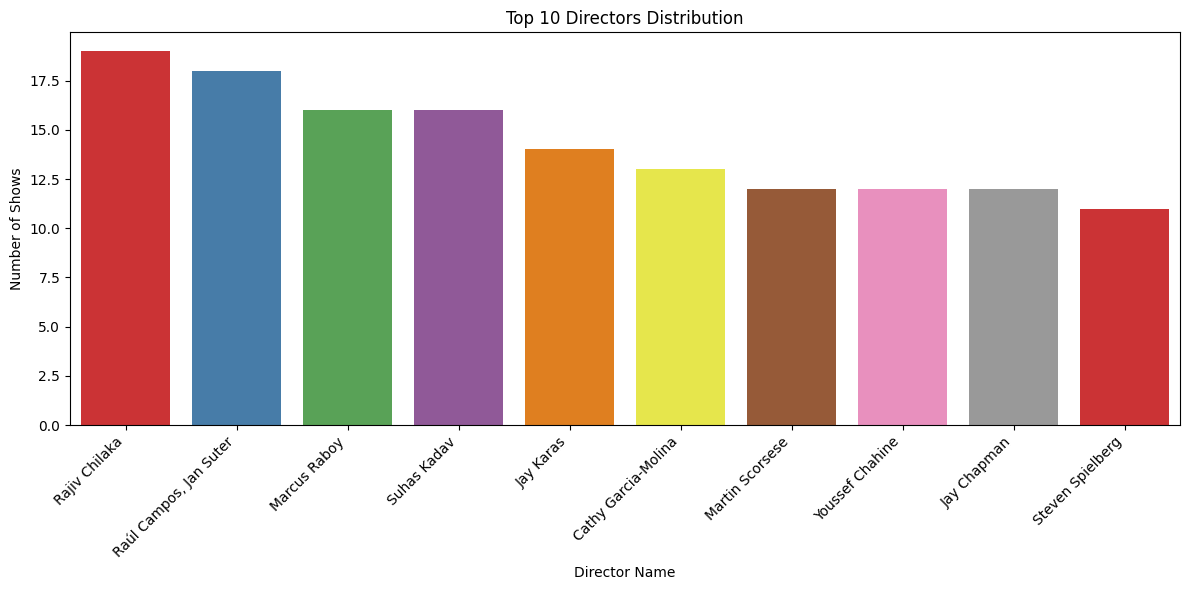

In [ ]:
# Plot a bar plot for the top 10 directors
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.index, y=top_directors.values, palette='Set1')
plt.xlabel('Director Name')
plt.ylabel('Number of Shows')
plt.title('Top 10 Directors Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Identifying the top 10 cast members

In [ ]:
top_cast = data['cast'].value_counts().head(10)
print("Top 10 most common cast members:")
print(top_cast)

Top 10 most common cast members:
David Attenborough                                                                                                        19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                   14
Samuel West                                                                                                               10
Jeff Dunham                                                                                                                7
David Spade, London Hughes, Fortune Feimster                                                                               6
Kevin Hart                                                                                                                 6
Craig Sechler                                                                                                              6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Ju

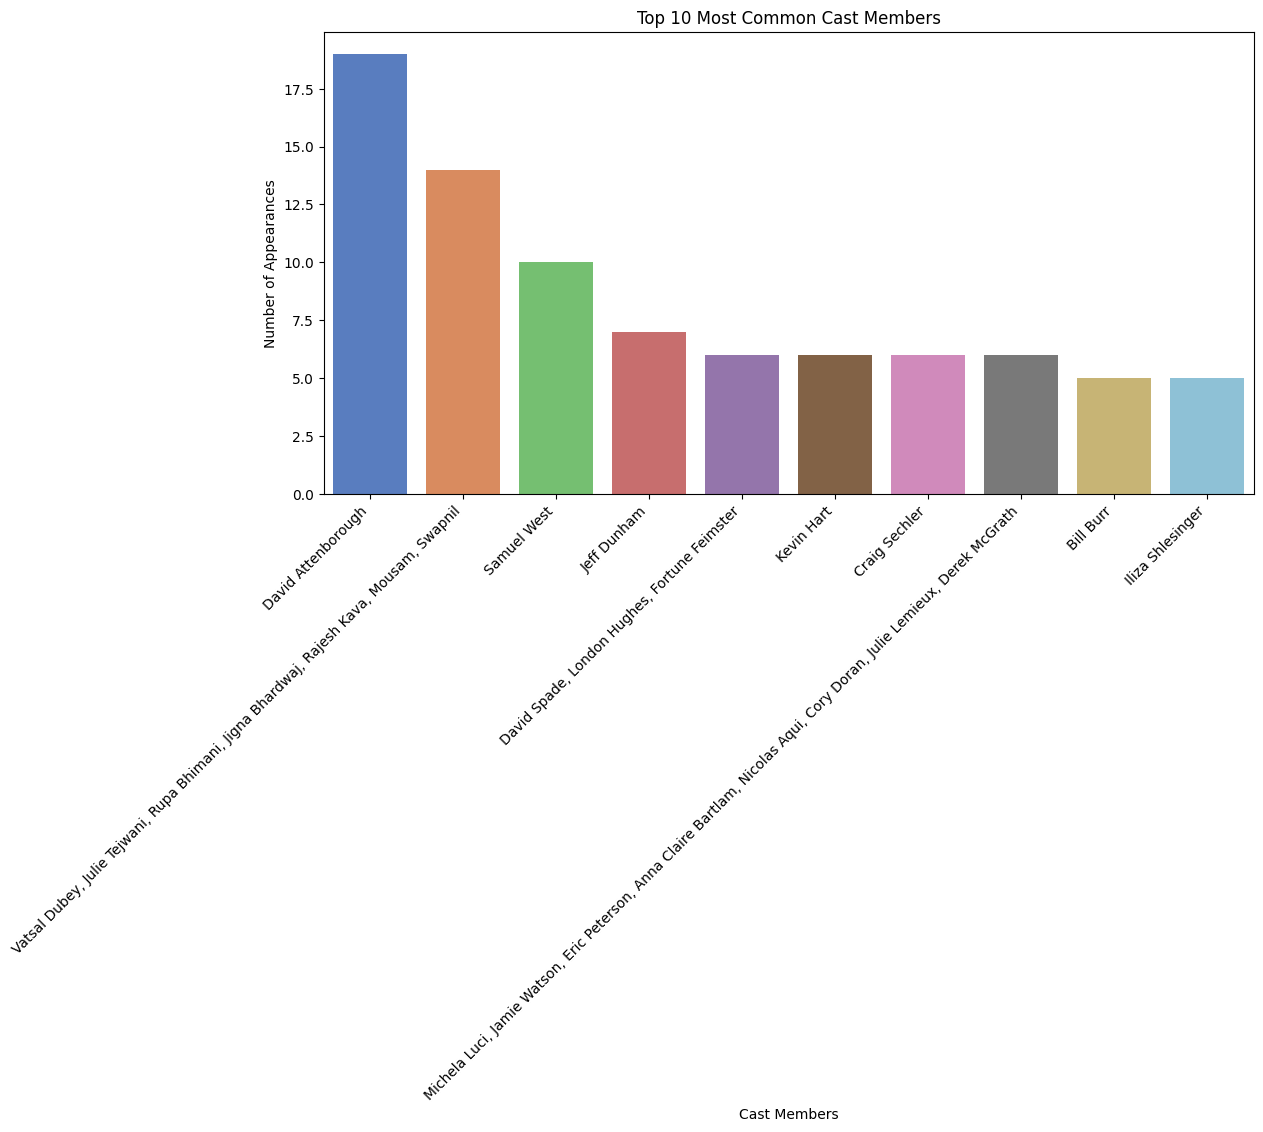

In [ ]:
# Plot a bar plot for the top 10 most common cast members
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cast.index, y=top_cast.values, palette='muted')
plt.xlabel('Cast Members')
plt.ylabel('Number of Appearances')
plt.title('Top 10 Most Common Cast Members')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Countries represented in the dataset

In [ ]:
top_countries = data['country'].value_counts().head(10)
print("Top 10 countries represented in the dataset:")
print(top_countries)

Top 10 countries represented in the dataset:
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64


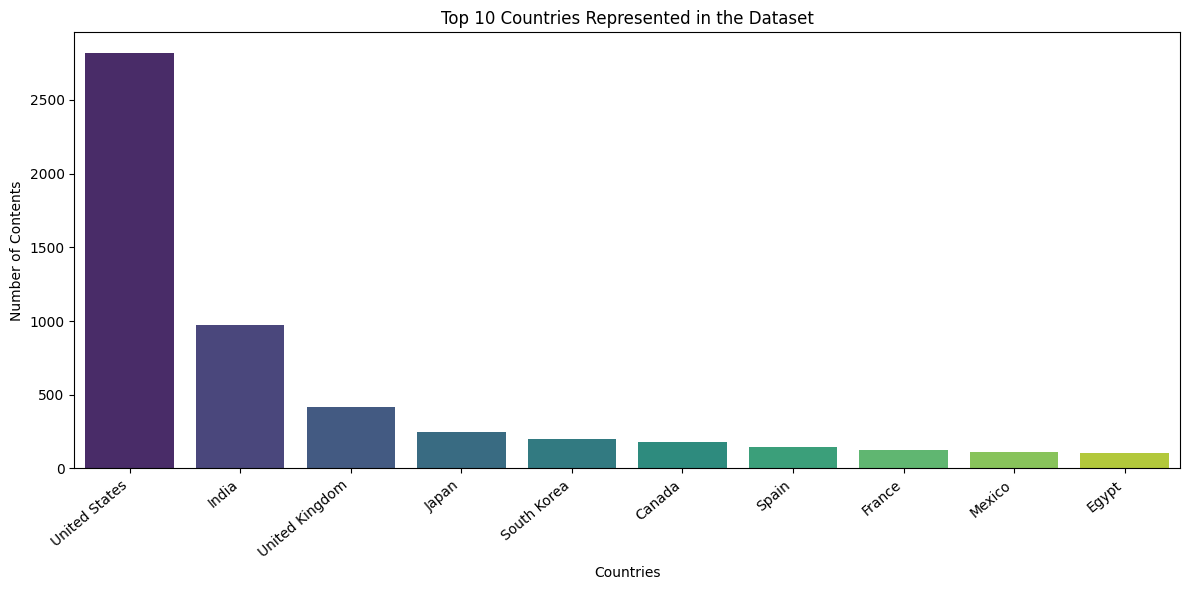

In [ ]:
# Plot a bar plot for the most represented countries
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values,  palette='viridis')
plt.xlabel('Countries')
plt.ylabel('Number of Contents')
plt.title('Top 10 Countries Represented in the Dataset')
plt.xticks(rotation=40, ha='right')
plt.tight_layout()
plt.show()

distribution of content added dates according year

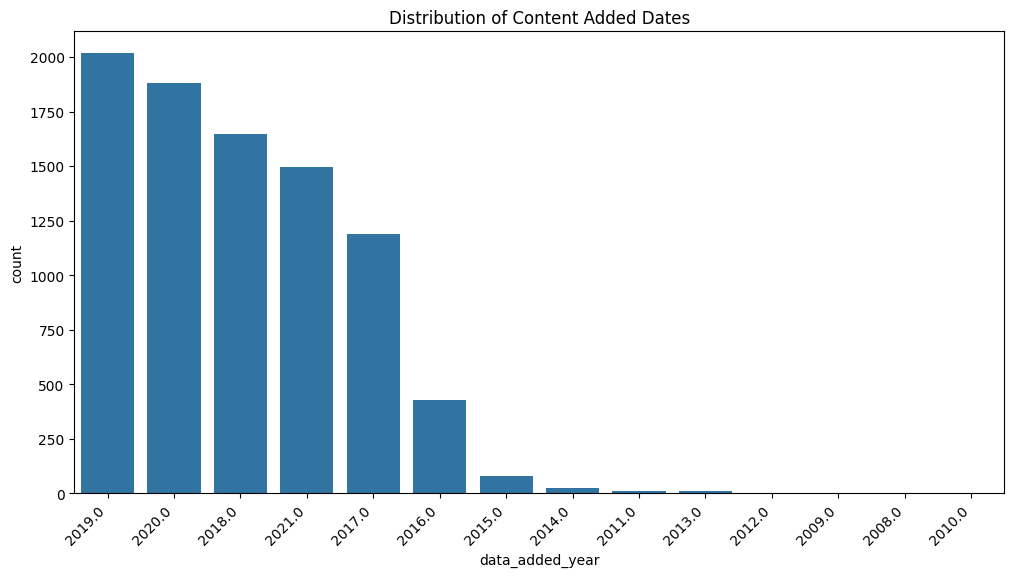

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='data_added_year', data=data, order=data['data_added_year'].value_counts().index)
plt.title('Distribution of Content Added Dates')
plt.xticks(rotation=45, ha='right')
plt.show()

distribution of content added dates according month

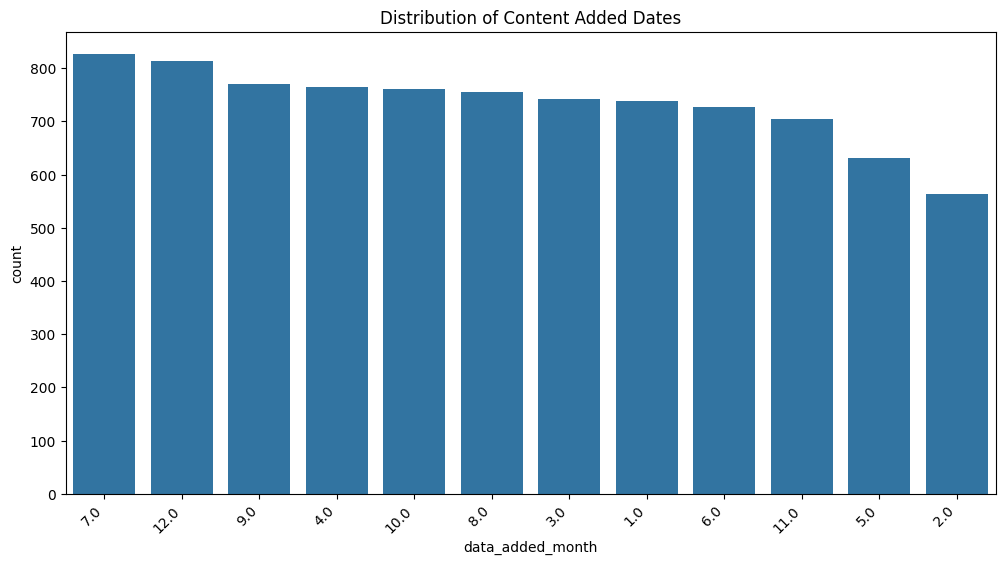

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='data_added_month', data=data, order=data['data_added_month'].value_counts().index)
plt.title('Distribution of Content Added Dates')
plt.xticks(rotation=45, ha='right')
plt.show()

distribution of release years for content

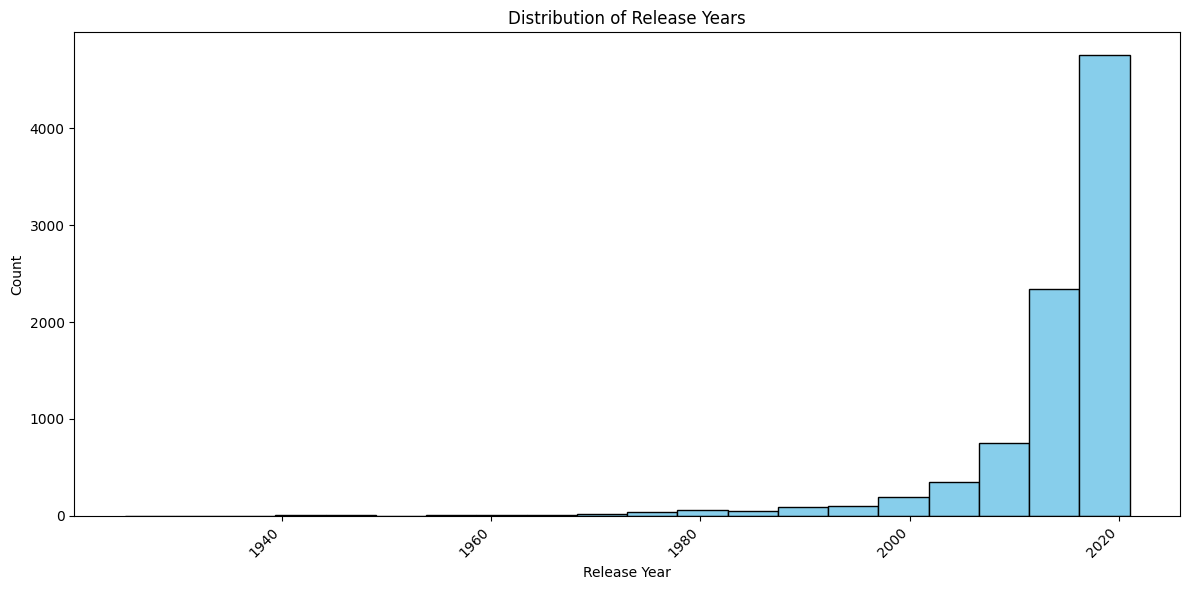

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(data['release_year'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

distribution of content ratings

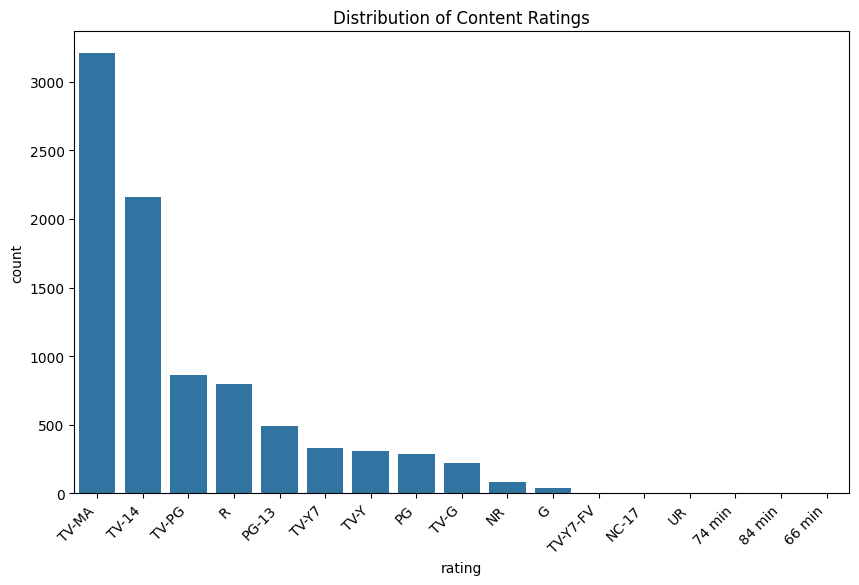

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=data, order=data['rating'].value_counts().index)
plt.title('Distribution of Content Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()

distribution of content durations for movies and TV shows

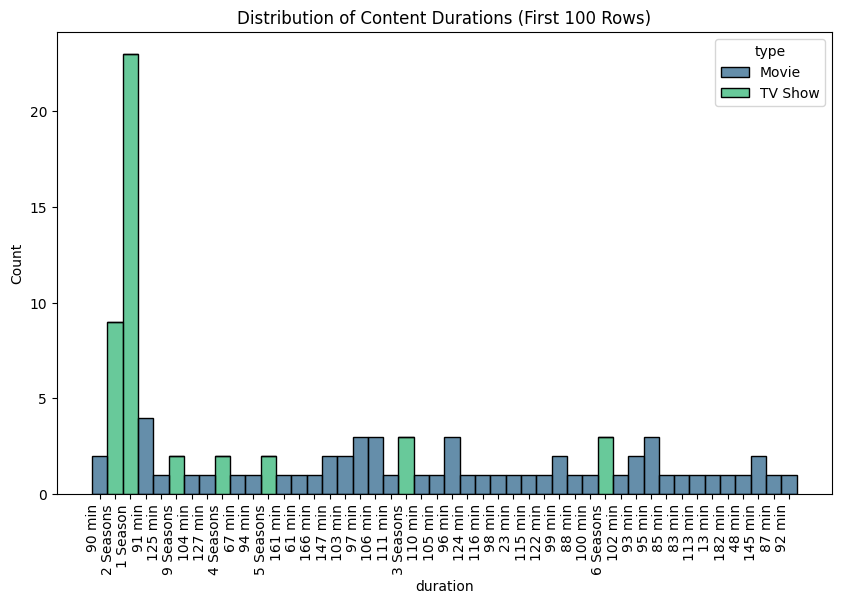

In [ ]:
subset_data = data.head(100)

# Create a histogram plot for the distribution of content durations
plt.figure(figsize=(10, 6))
sns.histplot(x='duration', data=subset_data,multiple='stack', hue='type', bins=20, palette='viridis')
plt.title('Distribution of Content Durations (First 100 Rows)')
plt.xticks(rotation=90, ha='right')
plt.show()

top 10 most common content categories

In [ ]:
top_categories = data['listed_in'].value_counts().head(10)
print("Top 10 most common content categories:")
print(top_categories)

Top 10 most common content categories:
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: listed_in, dtype: int64


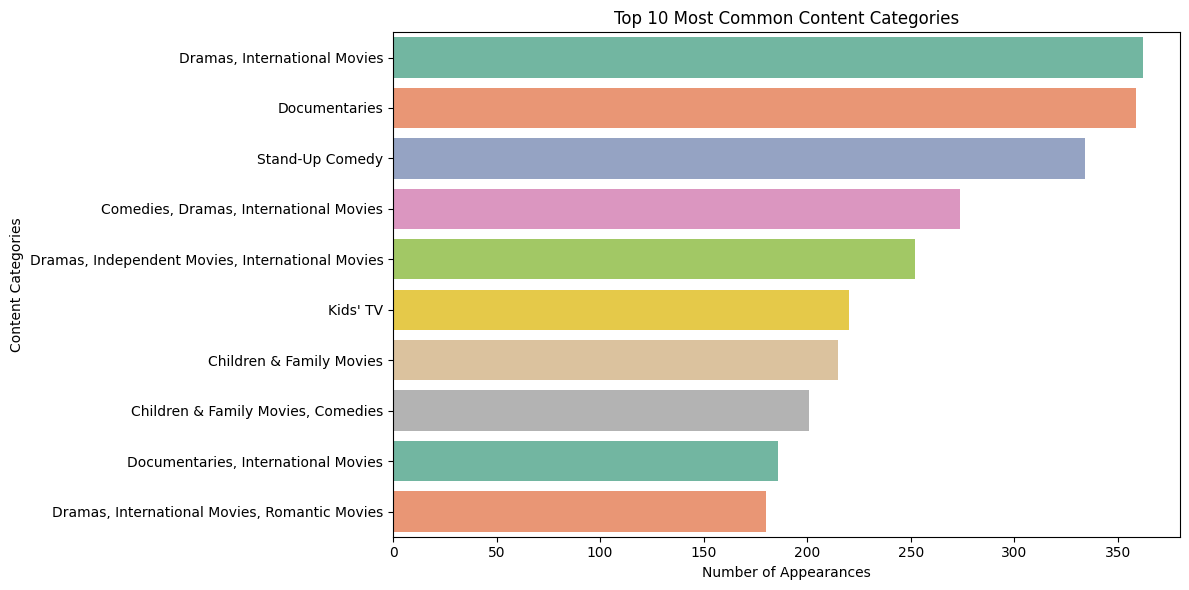

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='Set2')
plt.xlabel('Number of Appearances')
plt.ylabel('Content Categories')
plt.title('Top 10 Most Common Content Categories')
plt.tight_layout()
plt.show()



``
```

distribution of genres

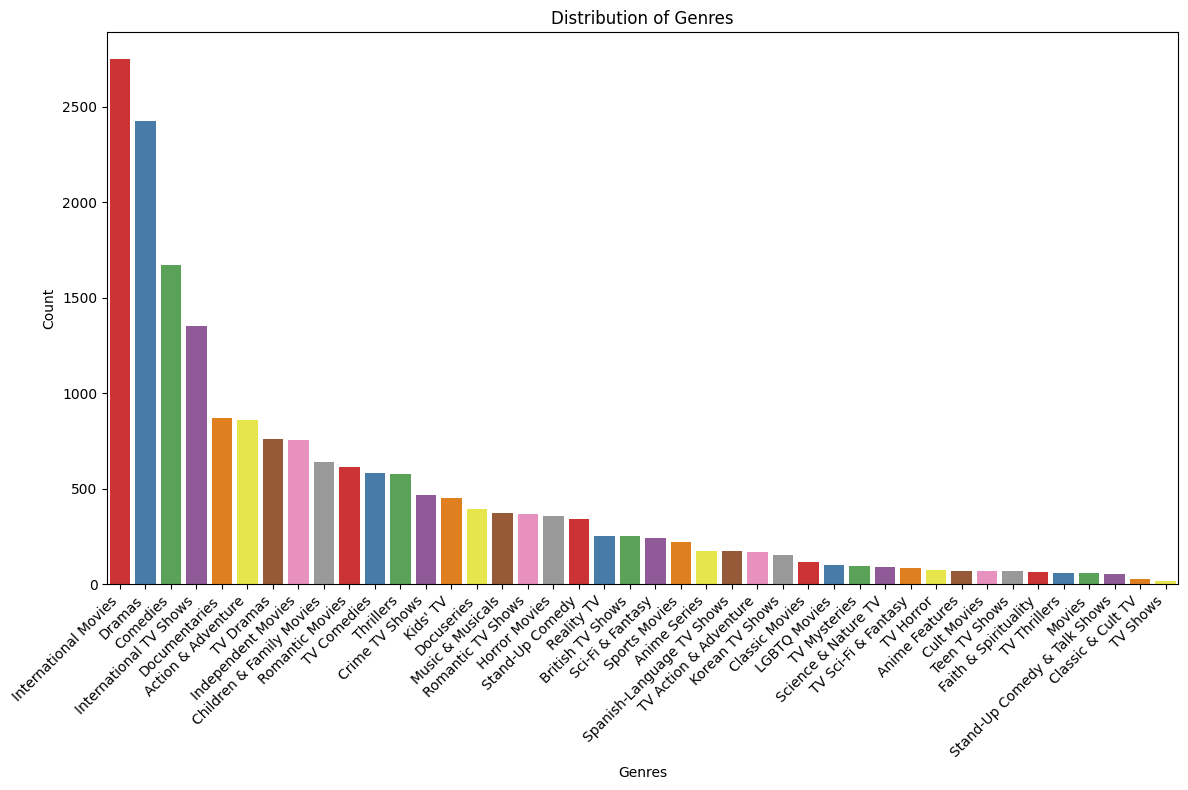

In [ ]:
# Filter out non-string values and use explode to transform the 'genres' column
genre_counts = data['listed_in'].dropna().apply(lambda x: x.split(', ')).explode().value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='Set1')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Distribution of Genres')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

Top 10 Highest-Rated Shows/Movies

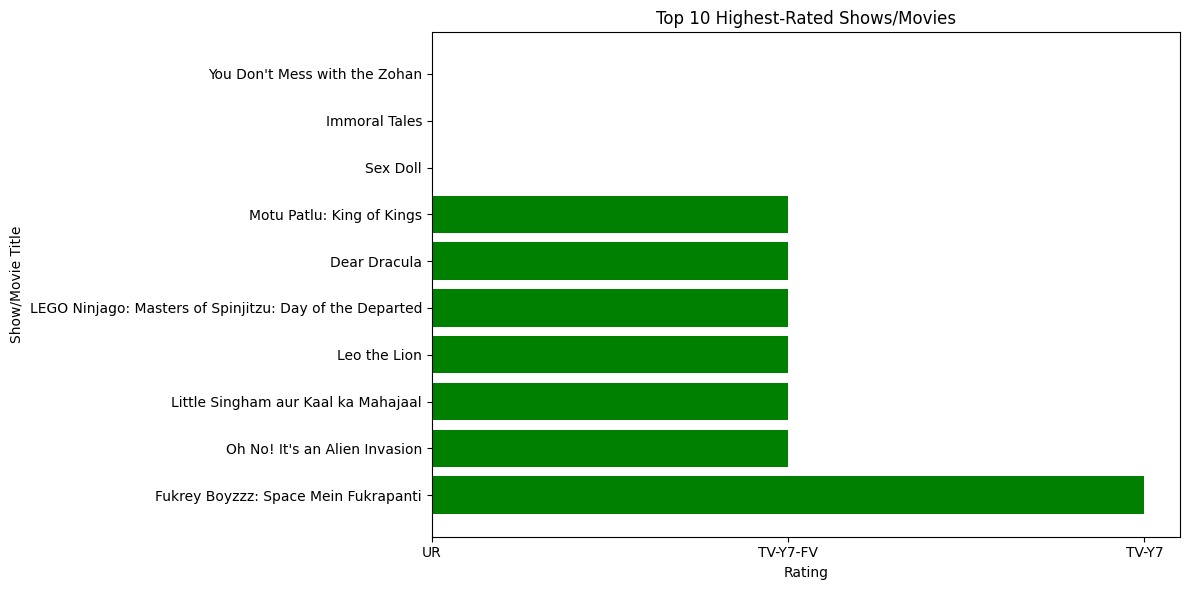

In [ ]:
sorted_df = data.sort_values(by='rating', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(sorted_df['title'], sorted_df['rating'], color = 'green')
plt.xlabel('Rating')
plt.ylabel('Show/Movie Title')
plt.title('Top 10 Highest-Rated Shows/Movies')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#Data pre-processing and cleaning

Checking Duplicates Data

In [ ]:
data.duplicated().sum()


0

Checking Cardinality of Categorical features


In [ ]:
data.select_dtypes(include='object').nunique()


show_id        8807
type              2
title          8807
director       4528
cast           7692
country         748
rating           17
duration        220
listed_in       514
description    8775
dtype: int64

dealing with missing values

In [ ]:
data.isnull().sum()


show_id                0
type                   0
title                  0
director            2634
cast                 825
country              831
release_year           0
rating                 4
duration               3
listed_in              0
description            0
data_added_day        10
data_added_month      10
data_added_year       10
dtype: int64

Checking Total Number & Percentage of Missing Values in Training Dataset


In [ ]:
df = (data.isnull().sum()[data.isnull().sum() > 0]).to_frame().rename(columns={0:'Number of Missing Values'})
df['% of Missing Values'] = round(100 * data.isnull().sum()[data.isnull().sum() > 0] / len(data), 2)
df

,Number of Missing Values,% of Missing Values
director,2634,29.91
cast,825,9.37
country,831,9.44
rating,4,0.05
duration,3,0.03
data_added_day,10,0.11
data_added_month,10,0.11
data_added_year,10,0.11


Visualizing Missing Numbers

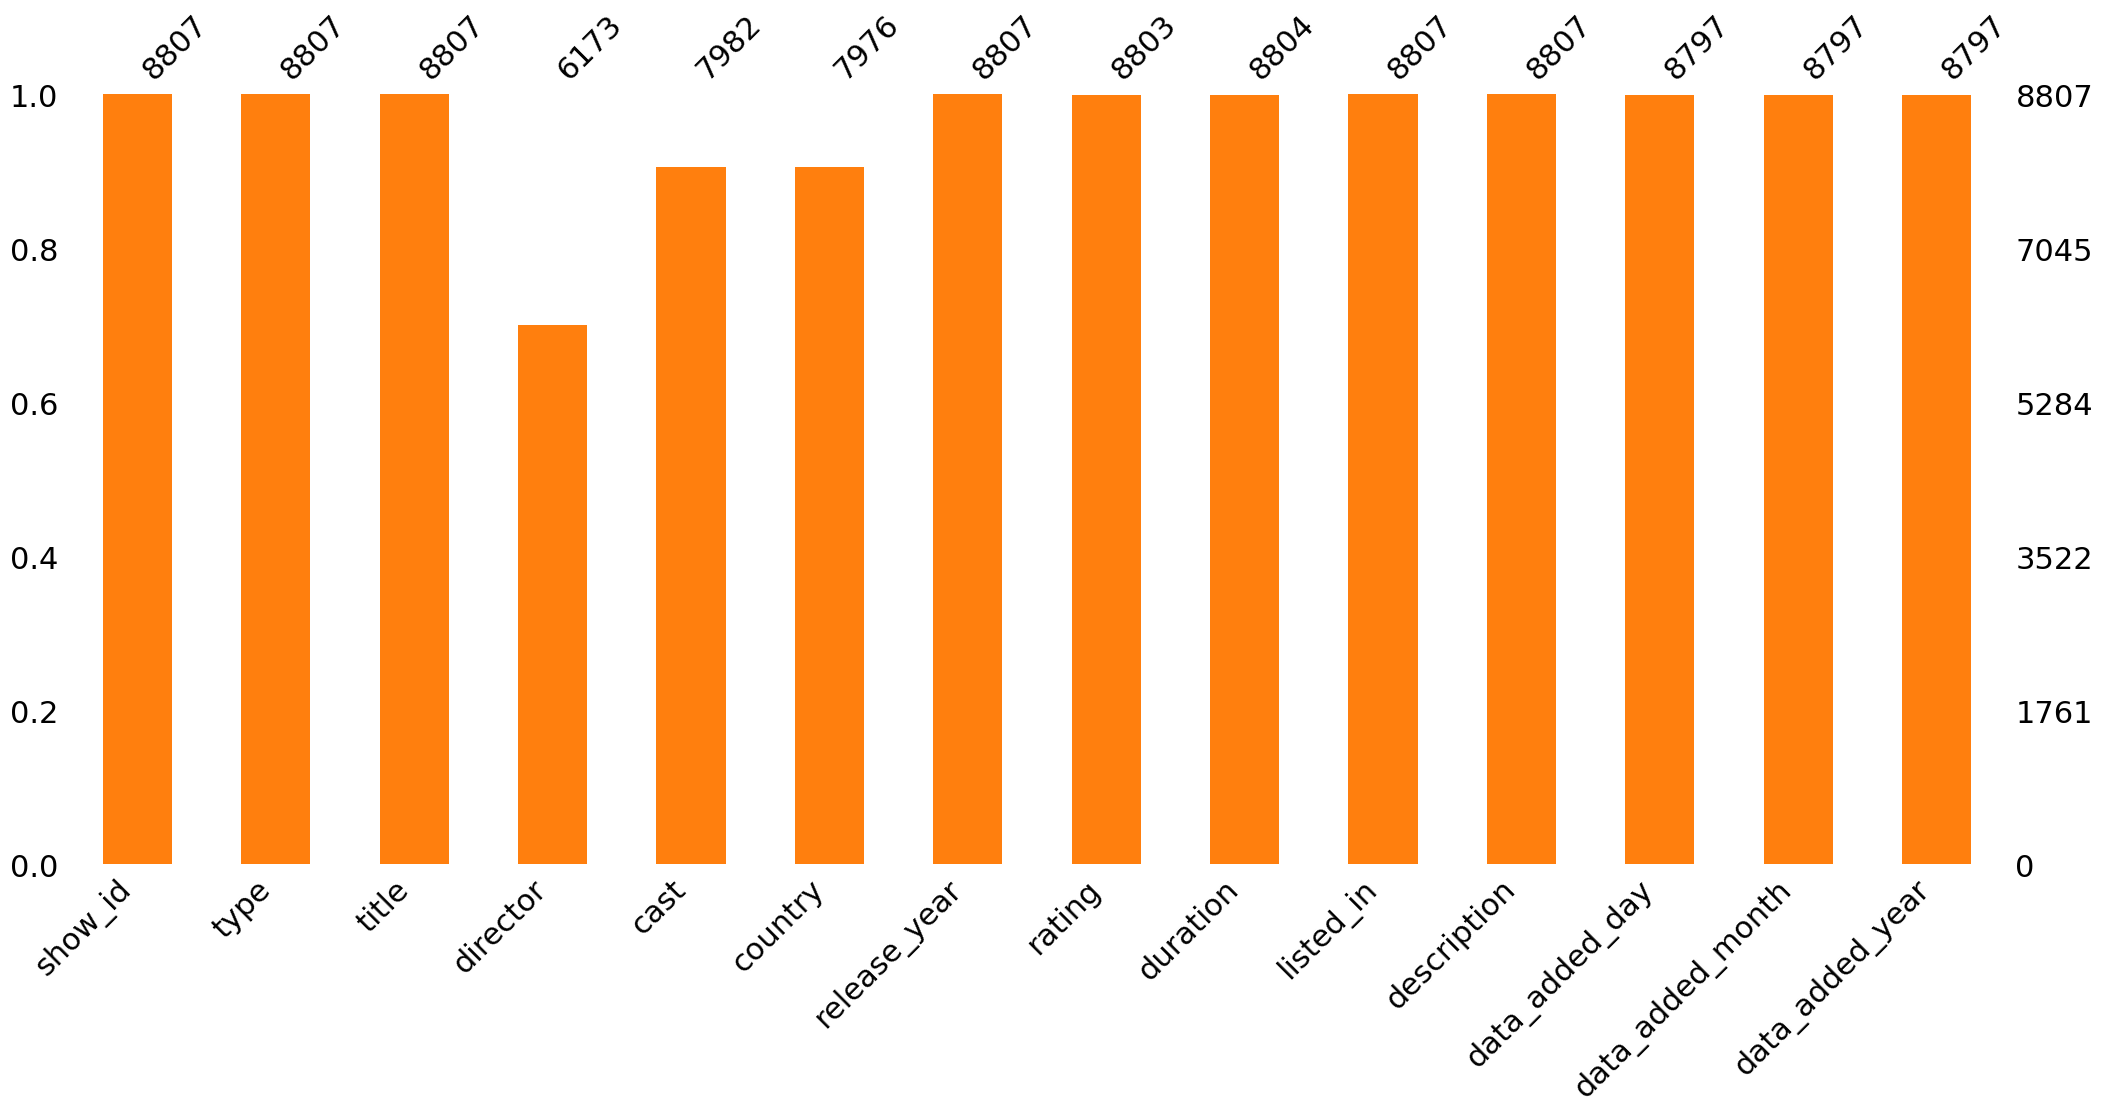

In [ ]:
import missingno as msno
msno.bar(data, color='C1', fontsize=22)
plt.show()


Handling Missing Values

In [ ]:
cat_cols = [col for col in data.columns if data[col].dtype=="object"]
num_cols = [col for col in data.columns if data[col].dtype!="object"]

In [ ]:
cat_cols

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'rating',
 'duration',
 'listed_in',
 'description']

In [ ]:
num_cols

['release_year', 'data_added_day', 'data_added_month', 'data_added_year']

Using Simple Imputer Library to Fill Missing Values

In [ ]:
from sklearn.impute import SimpleImputer


In [ ]:
imputer1 = SimpleImputer(strategy="most_frequent")   ##To fill Categorical Features.
imputer2 = SimpleImputer(strategy="median")            ##To fill numeircal features.

In [ ]:
def fill_missing_no(df):
    df[cat_cols] = imputer1.fit_transform(df[cat_cols])
    df[num_cols] = imputer2.fit_transform(df[num_cols])

In [ ]:
fill_missing_no(data)


 Missing numbers left in train_df


In [ ]:
data.isnull().sum()


show_id             0
type                0
title               0
director            0
cast                0
country             0
release_year        0
rating              0
duration            0
listed_in           0
description         0
data_added_day      0
data_added_month    0
data_added_year     0
dtype: int64

##Feature Encoding

For Nominal data(have No order)  ==> One hot encoding
For Ordinal data(have order) ==> Label enconding

In [ ]:
cat_cols


['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'rating',
 'duration',
 'listed_in',
 'description']

In [ ]:
num_cols


['release_year', 'data_added_day', 'data_added_month', 'data_added_year']

In [ ]:
data.dtypes


show_id              object
type                 object
title                object
director             object
cast                 object
country              object
release_year        float64
rating               object
duration             object
listed_in            object
description          object
data_added_day      float64
data_added_month    float64
data_added_year     float64
dtype: object

In [ ]:
data['show_id'].nunique() # Label encoding


8807

In [ ]:
data['type'].nunique() # Label encoding


2

In [ ]:
data['title'].nunique() # Target guided encoding


8807

In [ ]:
data['director'].nunique() # Target guided encoding


4528

In [ ]:
data['cast'].nunique() # Target guided encoding


7692

In [ ]:
data['country'].nunique() # Target guided encoding


748

In [ ]:
data['rating'].nunique() # Target guided encoding


17

In [ ]:
data['duration'].nunique() # Target guided encoding


220

In [ ]:
data['listed_in'].nunique() # Target guided encoding


514

In [ ]:
data['description'].nunique() # Target guided encoding


8775

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['show_id', 'type']:  # Label Encoding
    data[col] = le.fit_transform(data[col])


In [ ]:
data.head(3)


,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,data_added_day,data_added_month,data_added_year
0,0,0,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0
1,1111,1,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0
2,2222,1,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,2021.0


In [ ]:
def target_guided_encoding(i_col, t_col): # Target guided encoding
    i_col_index = data.groupby([i_col])[t_col].mean().sort_values().index
    i_col_dict = {key:index for index , key in enumerate(i_col_index , 0)}
    data[i_col] = data[i_col].map(i_col_dict)

In [ ]:
target_guided_encoding('title', 'type')


In [ ]:
target_guided_encoding('director', 'type')


In [ ]:
target_guided_encoding('cast', 'type')


In [ ]:
target_guided_encoding('country', 'type')


In [ ]:
target_guided_encoding('rating', 'type')


In [ ]:
target_guided_encoding('duration', 'type')


In [ ]:
target_guided_encoding('listed_in', 'type')


In [ ]:
target_guided_encoding('description', 'type')


In [ ]:
data.head()


,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,data_added_day,data_added_month,data_added_year
0,0,0,4445,805,5421,593,2020.0,1,68,30,3913,25.0,9.0,2021.0
1,1111,1,8252,4353,5711,571,2021.0,12,216,316,7914,24.0,9.0,2021.0
2,2222,1,7327,4323,5657,593,2021.0,12,205,493,6707,24.0,9.0,2021.0
3,3333,1,6859,4353,5421,593,2021.0,12,205,417,7546,24.0,9.0,2021.0
4,4444,1,6688,4353,7339,558,2021.0,12,216,453,7167,24.0,9.0,2021.0


Detecting outliers


In [ ]:
def plot(df, col):
    # Create a larger figure
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

    # Plot the distribution with kde
    sns.distplot(df[col], ax=ax1, color='b')
    ax1.set_title(f'Distribution of {col}')

    # Boxplot with custom whiskers
    sns.boxplot(df[col], ax=ax2, whis=1.5, color='g')
    ax2.set_title(f'Boxplot of {col}')

    # Distribution without kde (histogram)
    sns.histplot(df[col], ax=ax3, kde=False, bins=30, color='y')
    ax3.set_title(f'Histogram of {col}')

    # Apply log transformation if needed
    if (df[col] > 0).all():  # Check if all values are positive to avoid issues with log transformation
        ax1.set_yscale('log')
        ax3.set_yscale('log')

    plt.tight_layout()
    plt.show()

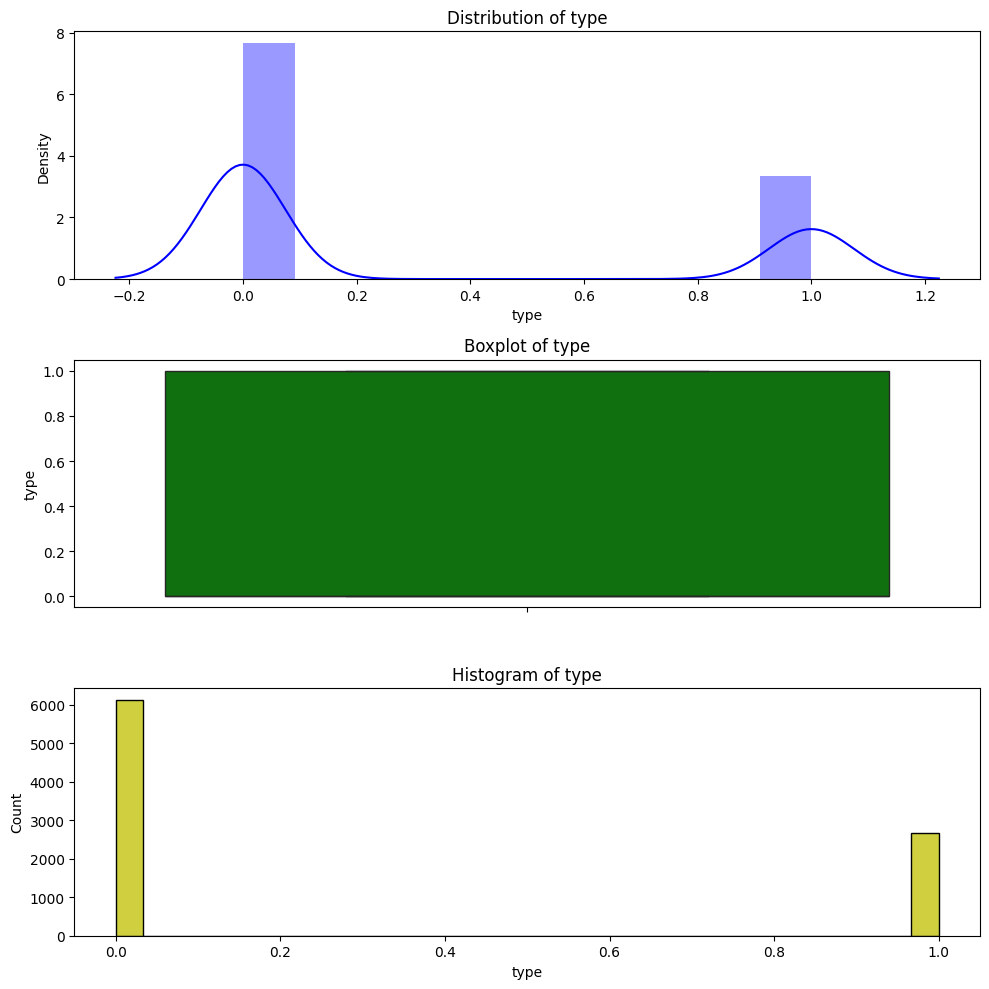

In [ ]:
plot(data, 'type')


In [ ]:
q1 = data['type'].quantile(0.25)
q3 = data['type'].quantile(0.75)

iqr = q3- q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [ ]:
maximum


2.5

In [ ]:
minimum

-1.5

In [ ]:
[x for x in data['type'] if x> maximum or x<minimum]


[]

In [ ]:
len([x for x in data['type'] if x> maximum or x<minimum]) # so, no outlier


0

Performing Feature Selection

In [ ]:
X = data.drop(['type'] , axis=1)


In [ ]:
y = data['type']


In [ ]:
from sklearn.feature_selection import mutual_info_regression


In [ ]:
imp = mutual_info_regression(X, y)


In [ ]:
imp


array([0.04456786, 0.61393158, 0.51337675, 0.54172918, 0.10825093,
       0.02768991, 0.09572512, 0.60343549, 0.62283769, 0.61361566,
       0.00069191, 0.00327603, 0.00630863])

In [ ]:
imp_df = pd.DataFrame(imp , index=X.columns)
imp_df


,0
show_id,0.044568
title,0.613932
director,0.513377
cast,0.541729
country,0.108251
release_year,0.027690
rating,0.095725
duration,0.603435
listed_in,0.622838
description,0.613616


In [ ]:
imp_df.columns = ['importance']


In [ ]:
imp_df

,importance
show_id,0.044568
title,0.613932
director,0.513377
cast,0.541729
country,0.108251
release_year,0.027690
rating,0.095725
duration,0.603435
listed_in,0.622838
description,0.613616


In [ ]:
imp_df.sort_values(by='importance' , ascending=False)


,importance
listed_in,0.622838
title,0.613932
description,0.613616
duration,0.603435
cast,0.541729
director,0.513377
country,0.108251
rating,0.095725
show_id,0.044568
release_year,0.027690


In [ ]:
data.drop(['data_added_day', 'data_added_month'], axis = 1, inplace = True)



In [ ]:
data.dtypes


show_id              int64
type                 int64
title                int64
director             int64
cast                 int64
country              int64
release_year       float64
rating               int64
duration             int64
listed_in            int64
description          int64
data_added_year    float64
dtype: object

In [ ]:
data['type'].unique()


array([0, 1])

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled


array([[-1.73185415,  0.01652007, -1.41849562, ...,  1.26521696,
         0.68267933,  1.35257903],
       [-1.29485893,  1.51394654,  1.01285732, ...,  1.16401661,
         0.68267933,  1.35257903],
       [-0.85786371,  1.15011164,  0.99229909, ...,  1.16401661,
         0.68267933,  1.35257903],
       ...,
       [ 1.67954059, -0.78431006, -0.78598751, ..., -1.16359145,
         1.26501812,  0.08133806],
       [ 1.67993393, -0.78509673, -1.74811252, ..., -0.15158794,
        -1.64667583,  0.71695854],
       [ 1.68032726, -0.78667007, -1.81321357, ..., -1.0623911 ,
        -1.06433704,  0.08133806]])

#Building Machine learning model

Spliting the data into training and testing dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



In [ ]:
X_train

,show_id,title,director,cast,country,release_year,rating,duration,listed_in,description,data_added_day,data_added_month,data_added_year
8279,8090,3500,2782,5278,593,2015.0,12,63,91,2964,1.0,8.0,2018.0
4671,4081,3077,2095,38,607,2017.0,12,72,160,3622,1.0,9.0,2018.0
2303,1451,6565,4353,5856,593,2020.0,12,205,336,8584,2.0,7.0,2020.0
4058,3400,33,3856,4020,595,2014.0,14,65,274,231,1.0,3.0,2019.0
2777,1976,6916,4353,5757,590,2020.0,12,205,314,6459,26.0,3.0,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,5262,668,228,3542,593,2016.0,15,19,114,719,1.0,11.0,2016.0
5191,4659,8384,4353,5623,593,2010.0,12,205,314,7589,1.0,11.0,2017.0
5390,4880,7159,4353,6951,646,2014.0,11,205,482,6306,1.0,7.0,2017.0
860,8456,6062,2275,5421,632,2020.0,12,69,22,2774,20.0,5.0,2021.0


In [ ]:
X_train.shape

(6605, 13)

Splitting Data For Model Which Need Scaled Data.


In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


In [ ]:
X_train1

array([[ 1.45022627, -0.35518153, -0.06370848, ..., -1.16359145,
         0.39150993, -0.55428243],
       [-0.12665388, -0.52156225, -0.53449187, ..., -1.16359145,
         0.68267933, -0.55428243],
       [-1.16112502,  0.85039034,  1.01285732, ..., -1.0623911 ,
         0.10034054,  0.71695854],
       ...,
       [ 0.18762081,  1.08403135,  1.01285732, ..., -1.16359145,
         0.10034054, -1.18990291],
       [ 1.59418689,  0.65254282, -0.41114251, ...,  0.75921521,
        -0.48199825,  1.35257903],
       [ 1.0092977 , -1.34441914,  0.55372359, ..., -1.16359145,
         0.39150993,  0.08133806]])

In [ ]:
X_train1.shape


(6605, 13)

In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
ml_model = RandomForestRegressor()


In [ ]:
ml_model.fit(X_train , y_train)


RandomForestRegressor()

In [ ]:
y_pred = ml_model.predict(X_test)
y_pred


array([0., 0., 1., ..., 0., 0., 0.])

In [ ]:
from sklearn import metrics


In [ ]:
metrics.r2_score(y_test , y_pred)


0.9999495401370267

Define Evaluation metric


In [ ]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape(y_test, y_pred)


nan

Model Building For Scaled Data


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix


In [ ]:
evaluation_results = []


In [ ]:
def evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)

    # Printing training score
    training_score = model.score(X_train, y_train)
    print(f'Training score : {training_score}')

    # Printing testing score
    testing_score = model.score(X_test, y_test)
    print(f'Testing score : {testing_score}')

    evaluation_results.append({
        "Model": model_name,
        "Training Score": training_score,
        "Testing Score": testing_score,
    })
    # Making predictions on the test set
    y_prediction = model.predict(X_test)

    # Printing predictions
    print(f'Predictions are : {y_prediction}')
    print('\n')

    # Calculating and printing evaluation metrics
    print(f'R2 score : {metrics.r2_score(y_test, y_prediction)}')
    print(f'MAE : {metrics.mean_absolute_error(y_test, y_prediction)}')
    print(f'MSE : {metrics.mean_squared_error(y_test, y_prediction)}')
    print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test, y_prediction))}')
    print(f'MAPE : {mape(y_test, y_prediction)}')

    # Plotting the distribution of residuals with a colorful style
    plt.figure(figsize=(12, 6))
    sns.distplot(y_test - y_prediction, color='orange', hist_kws=dict(edgecolor="black", linewidth=1))
    plt.title('Residuals Distribution', fontsize=16, color='blue')
    plt.xlabel('Residuals', fontsize=12, color='green')
    plt.ylabel('Density', fontsize=12, color='purple')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xlim(-0.4, 0.4)
    plt.ylim(0, 50)
    plt.show()

    # Model prediction details with colorful text
    print("\n------------------------------------------------------------------------")
    print(f"Accuracy Score on Testing Data is: {accuracy_score(y_test, y_prediction) * 100:.2f}%")
    print(f"Precision Score is: {precision_score(y_test, y_prediction)}")
    print(f"Recall Score is: {recall_score(y_test, y_prediction)}")
    print(f"F1 Score is: {f1_score(y_test, y_prediction)}")

    # Confusion Matrix with a colorful heatmap
    print("\n------------------------------------------------------------------------")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_prediction)
    plt.figure(figsize=(8, 4))
    sns.heatmap(cm, annot=True, fmt="g", cmap="viridis", linewidths=.5, cbar_kws={"shrink": 0.8})
    plt.show()

Logistic-Regression Model


In [ ]:
from sklearn.linear_model import LogisticRegression


Training score : 1.0
Testing score : 1.0
Predictions are : [0 0 1 ... 0 0 0]


R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0
MAPE : nan


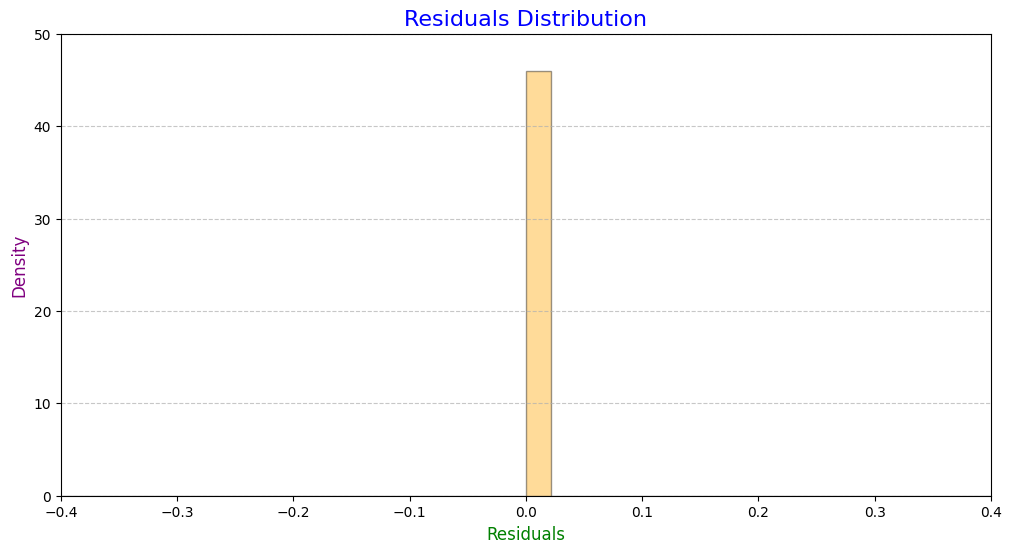


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 100.00%
Precision Score is: 1.0
Recall Score is: 1.0
F1 Score is: 1.0

------------------------------------------------------------------------
Confusion Matrix:


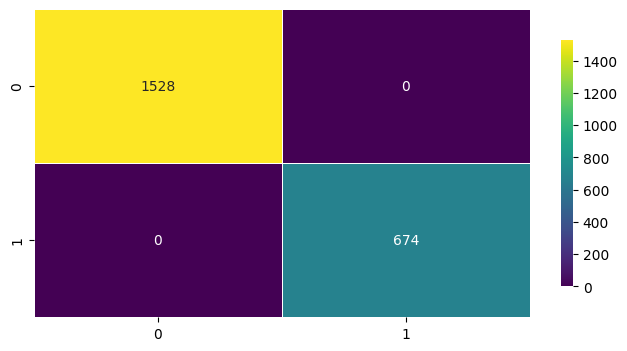

In [ ]:
evaluate_model(LogisticRegression(),'Logistic Regression', X_train1, y_train1, X_test1, y_test1)


KNeighborsClassifier Model


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


Training score : 1.0
Testing score : 0.9995458673932789
Predictions are : [0 0 1 ... 0 0 0]


R2 score : 0.9978618702129973
MAE : 0.00045413260672116256
MSE : 0.00045413260672116256
RMSE : 0.02131038729636706
MAPE : nan


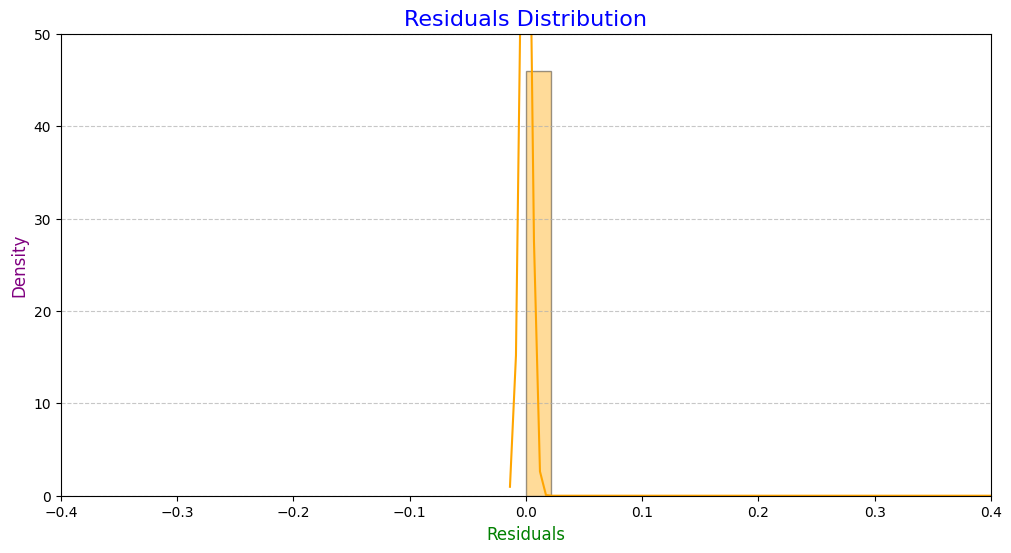


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 99.95%
Precision Score is: 1.0
Recall Score is: 0.9985163204747775
F1 Score is: 0.9992576095025985

------------------------------------------------------------------------
Confusion Matrix:


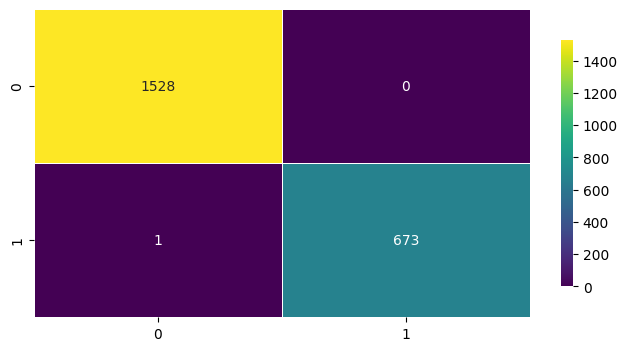

In [ ]:
evaluate_model(KNeighborsClassifier(), 'KNN', X_train1, y_train1, X_test1, y_test1)


Support-Vector-Classifier Model


In [ ]:
from sklearn.svm import SVC


Training score : 1.0
Testing score : 0.9995458673932789
Predictions are : [0 0 1 ... 0 0 0]


R2 score : 0.9978618702129973
MAE : 0.00045413260672116256
MSE : 0.00045413260672116256
RMSE : 0.02131038729636706
MAPE : nan


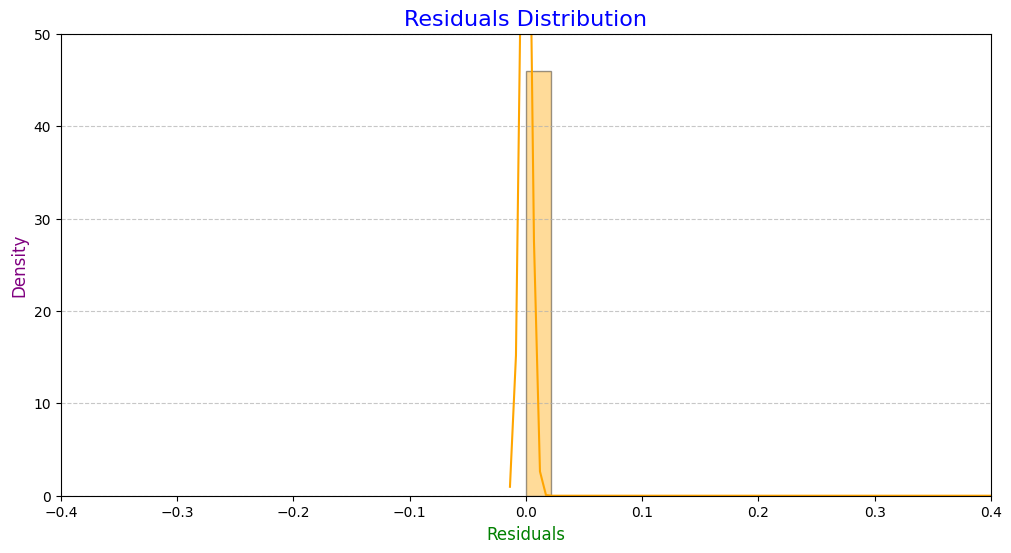


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 99.95%
Precision Score is: 1.0
Recall Score is: 0.9985163204747775
F1 Score is: 0.9992576095025985

------------------------------------------------------------------------
Confusion Matrix:


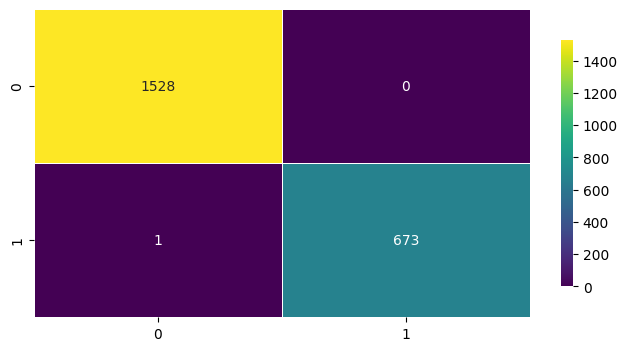

In [ ]:
evaluate_model(SVC(), 'SVM', X_train1, y_train1, X_test1, y_test1)


Naive-Bayes Model


In [ ]:
from sklearn.naive_bayes import GaussianNB


Training score : 0.9993943981831945
Testing score : 0.9990917347865577
Predictions are : [0 0 1 ... 0 0 0]


R2 score : 0.9957237404259947
MAE : 0.0009082652134423251
MSE : 0.0009082652134423251
RMSE : 0.030137438733945608
MAPE : nan


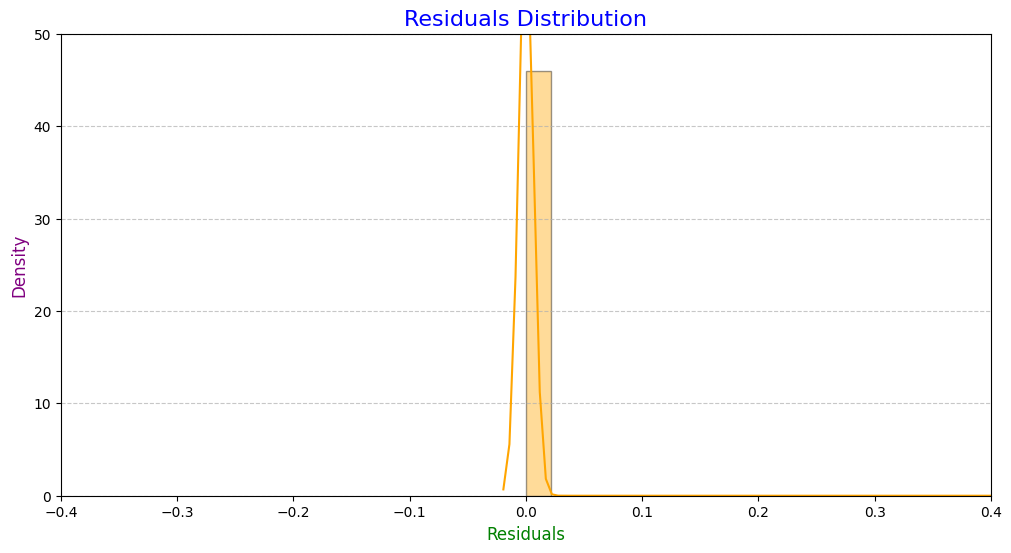


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 99.91%
Precision Score is: 1.0
Recall Score is: 0.9970326409495549
F1 Score is: 0.9985141158989599

------------------------------------------------------------------------
Confusion Matrix:


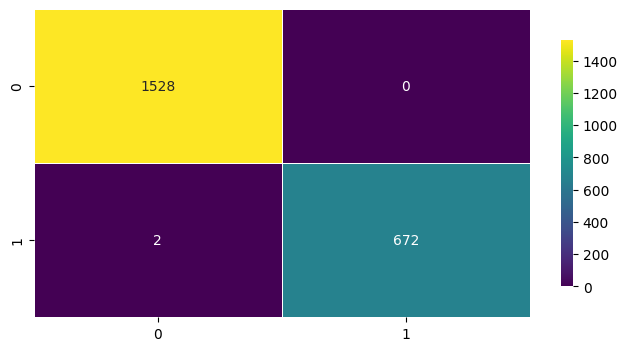

In [ ]:
evaluate_model(GaussianNB(), 'Naive Bayes', X_train1, y_train1, X_test1, y_test1)


Model Building For Un-Scaled Data¶


Decision-Tree-Classifier Model


In [ ]:
from sklearn.tree import DecisionTreeClassifier


Training score : 1.0
Testing score : 1.0
Predictions are : [0 0 1 ... 0 0 0]


R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0
MAPE : nan


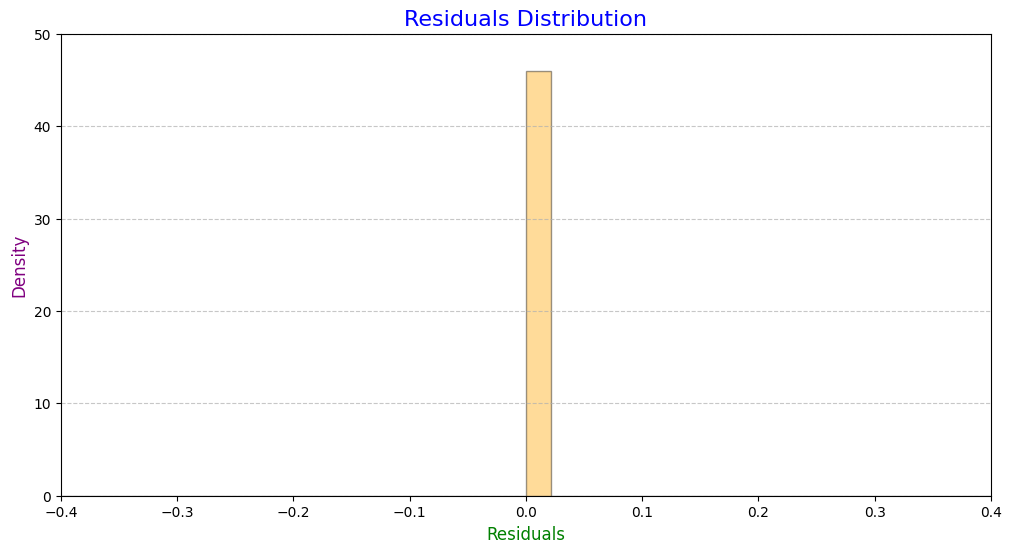


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 100.00%
Precision Score is: 1.0
Recall Score is: 1.0
F1 Score is: 1.0

------------------------------------------------------------------------
Confusion Matrix:


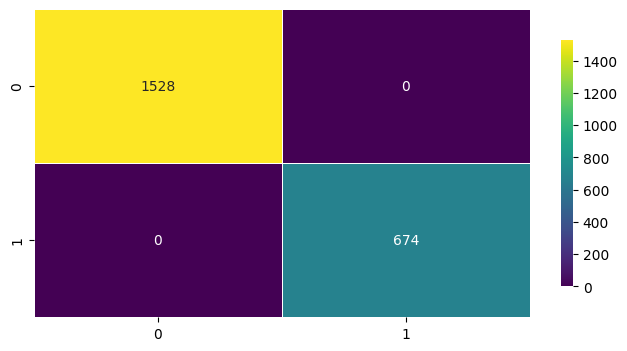

In [ ]:
evaluate_model(DecisionTreeClassifier(), 'Descision Tree', X_train, y_train, X_test, y_test)


Random-Forest-Classifier Model


In [ ]:
from sklearn.ensemble import RandomForestClassifier


Training score : 1.0
Testing score : 1.0
Predictions are : [0 0 1 ... 0 0 0]


R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0
MAPE : nan


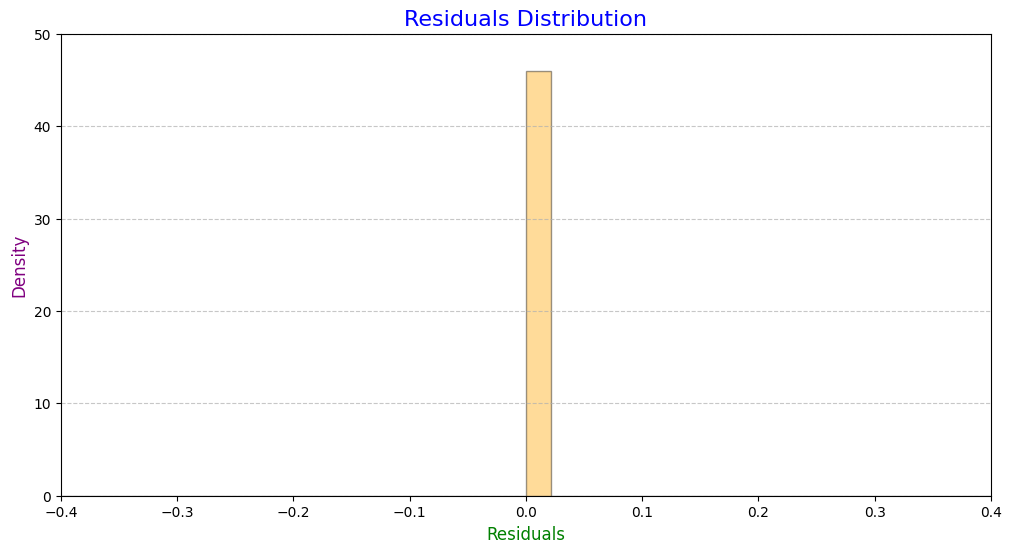


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 100.00%
Precision Score is: 1.0
Recall Score is: 1.0
F1 Score is: 1.0

------------------------------------------------------------------------
Confusion Matrix:


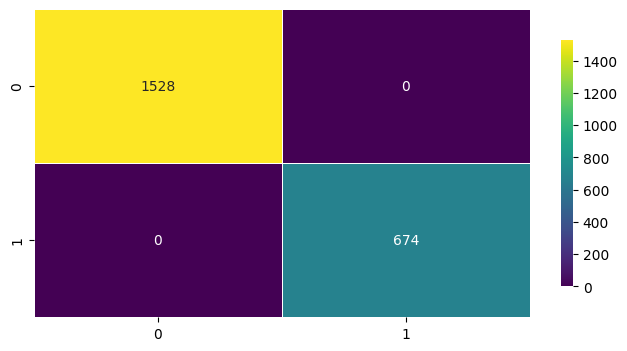

In [ ]:
evaluate_model(RandomForestClassifier(), 'Random Forest', X_train, y_train, X_test, y_test)


Ada-Boost-Classifier Model


In [ ]:
from sklearn.ensemble import AdaBoostClassifier


Training score : 1.0
Testing score : 1.0
Predictions are : [0 0 1 ... 0 0 0]


R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0
MAPE : nan


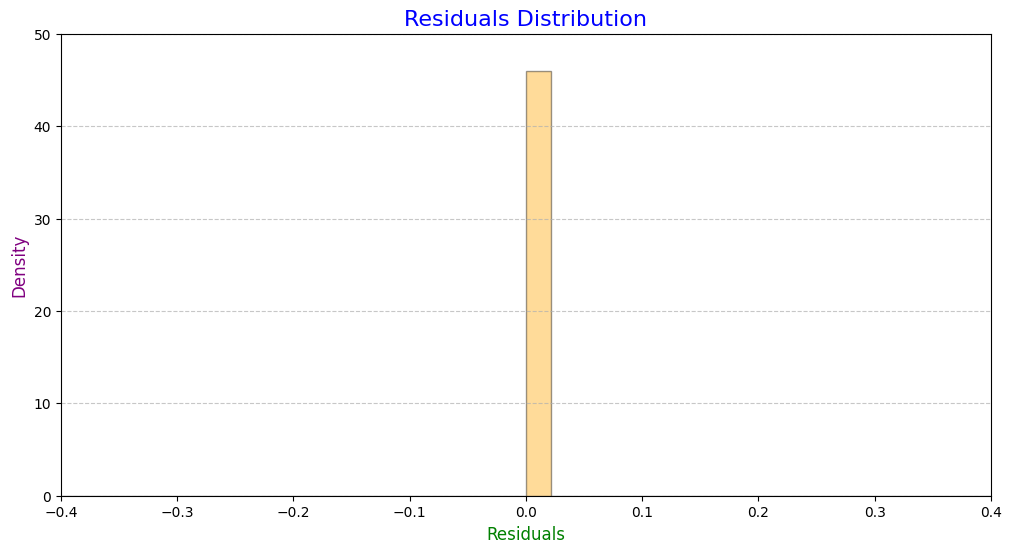


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 100.00%
Precision Score is: 1.0
Recall Score is: 1.0
F1 Score is: 1.0

------------------------------------------------------------------------
Confusion Matrix:


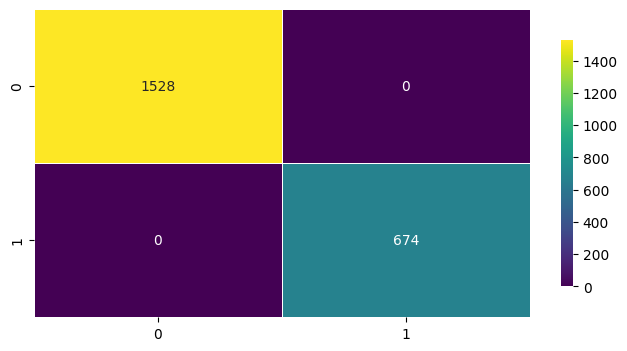

In [ ]:
evaluate_model(AdaBoostClassifier(), 'Ada Boost', X_train, y_train, X_test, y_test)


Gradient-Boosting-Classifier Model


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


Training score : 1.0
Testing score : 1.0
Predictions are : [0 0 1 ... 0 0 0]


R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0
MAPE : nan


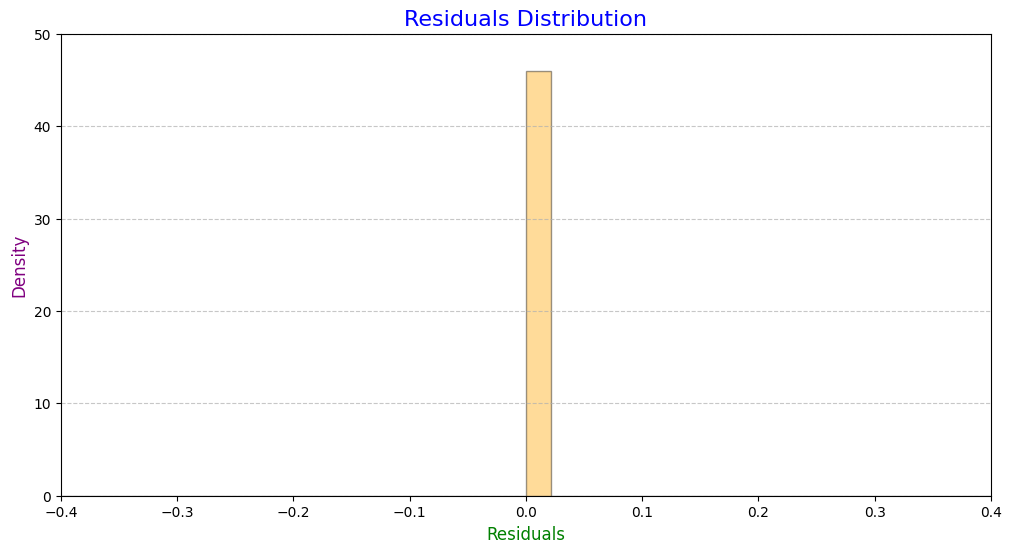


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 100.00%
Precision Score is: 1.0
Recall Score is: 1.0
F1 Score is: 1.0

------------------------------------------------------------------------
Confusion Matrix:


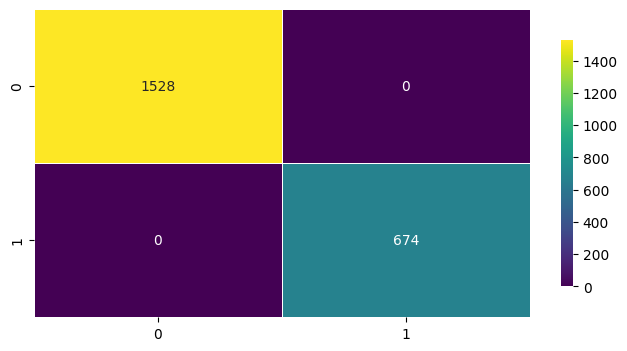

In [ ]:
evaluate_model(GradientBoostingClassifier(), 'Gradient Boost', X_train, y_train, X_test, y_test)


LGMB Classifier Model


In [ ]:
from lightgbm import LGBMClassifier


[LightGBM] [Info] Number of positive: 2002, number of negative: 4603
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2045
[LightGBM] [Info] Number of data points in the train set: 6605, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.303104 -> initscore=-0.832562
[LightGBM] [Info] Start training from score -0.832562
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

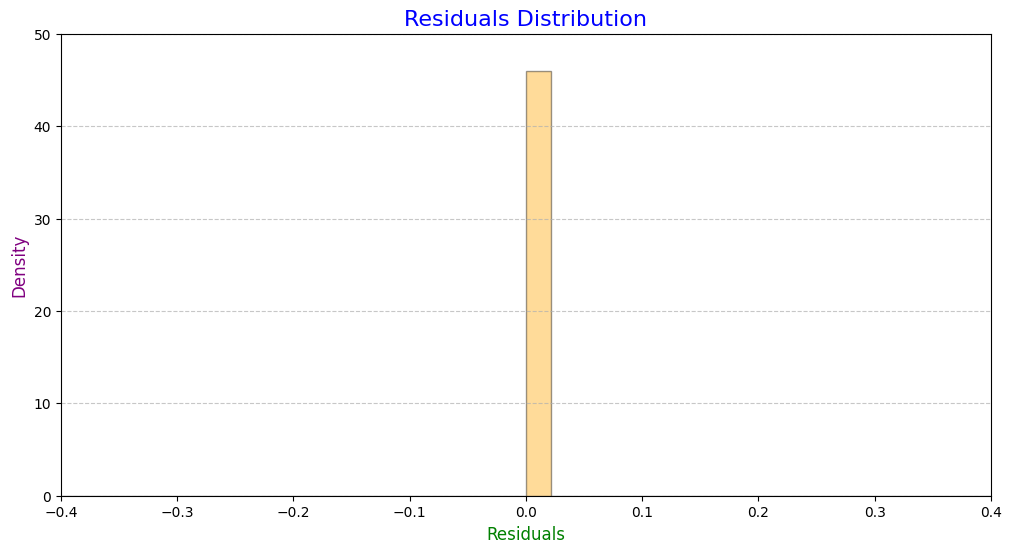


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 100.00%
Precision Score is: 1.0
Recall Score is: 1.0
F1 Score is: 1.0

------------------------------------------------------------------------
Confusion Matrix:


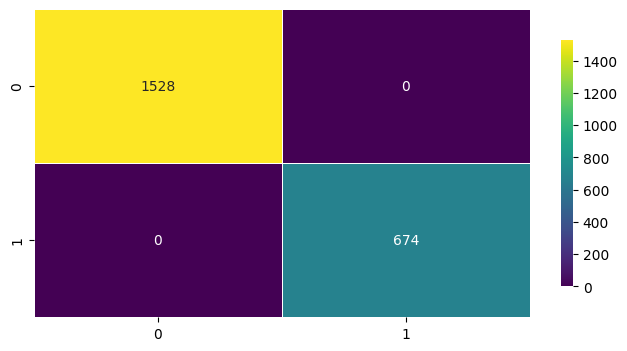

In [ ]:
evaluate_model(LGBMClassifier(),'LGBM', X_train, y_train, X_test, y_test)


XGBClassifier Model


In [ ]:
from xgboost import XGBClassifier


Training score : 1.0
Testing score : 1.0
Predictions are : [0 0 1 ... 0 0 0]


R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0
MAPE : nan


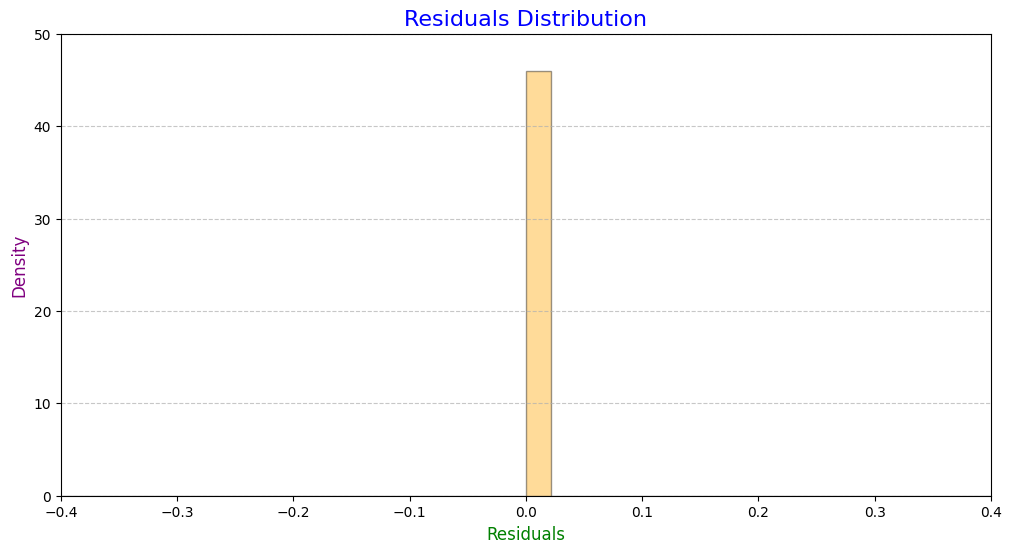


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 100.00%
Precision Score is: 1.0
Recall Score is: 1.0
F1 Score is: 1.0

------------------------------------------------------------------------
Confusion Matrix:


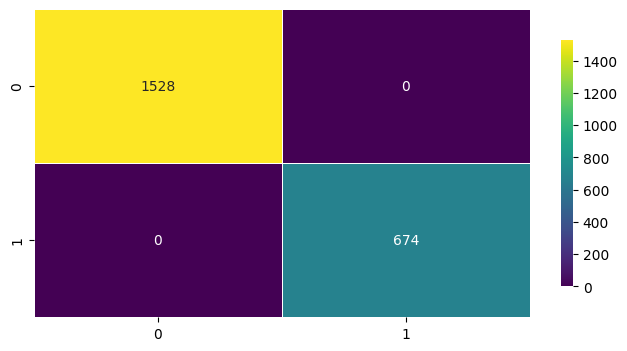

In [ ]:
evaluate_model(XGBClassifier(),'XG Boost', X_train, y_train, X_test, y_test)


All Model Performance Comparison



In [ ]:
df_results = pd.DataFrame(evaluation_results)


In [ ]:
df_results


,Model,Training Score,Testing Score
0,Logistic Regression,1.000000,1.000000
1,KNN,1.000000,0.999546
2,SVM,1.000000,0.999546
3,Naive Bayes,0.999394,0.999092
4,Descision Tree,1.000000,1.000000
5,Random Forest,1.000000,1.000000
6,Ada Boost,1.000000,1.000000
7,Gradient Boost,1.000000,1.000000
8,LGBM,1.000000,1.000000
9,XG Boost,1.000000,1.000000


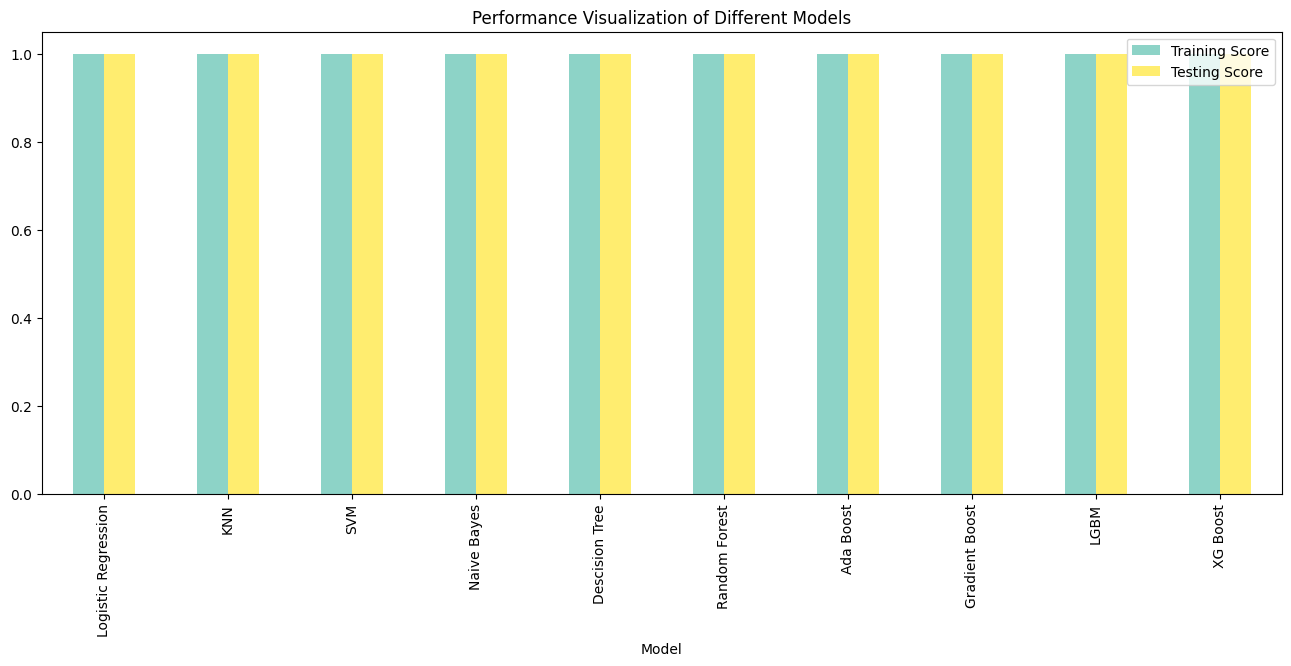

In [ ]:
df_results.plot(x="Model",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set3")
plt.show()

Hyper-Parameter Tunning of LGBM Model


In [ ]:
model1 = LGBMClassifier()


In [ ]:
parameters1 = {"n_estimators":[100,300,500,600,650],
              "learning_rate":[0.01,0.02,0.03],
              "random_state":[0,42,48,50],
               "num_leaves":[16,17,18]}

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# When search space is small & computational resources are enough ==> Grid Search
# When search space is large & computational resources are limited ==> Random Search

In [ ]:
grid_search1 = GridSearchCV(model1, parameters1, cv=5, n_jobs=-1)


In [ ]:
grid_search1.fit(X_train,y_train.values.ravel())


[LightGBM] [Info] Number of positive: 2002, number of negative: 4603
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2045
[LightGBM] [Info] Number of data points in the train set: 6605, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.303104 -> initscore=-0.832562
[LightGBM] [Info] Start training from score -0.832562
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03],
                         'n_estimators': [100, 300, 500, 600, 650],
                         'num_leaves': [16, 17, 18],
                         'random_state': [0, 42, 48, 50]})

In [ ]:
grid_search1.best_score_


1.0

In [ ]:
best_parameters1 = grid_search1.best_params_
best_parameters1

{'learning_rate': 0.01,
 'n_estimators': 300,
 'num_leaves': 16,
 'random_state': 0}

Creating LGBM Model Using Best Parameters.


In [ ]:
model1 = LGBMClassifier(**best_parameters1)


In [ ]:
model1.fit(X_train,y_train)


[LightGBM] [Info] Number of positive: 2128, number of negative: 4917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1293
[LightGBM] [Info] Number of data points in the train set: 7045, number of used features: 125
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.302058 -> initscore=-0.837516
[LightGBM] [Info] Start training from score -0.837516
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

LGBMClassifier(learning_rate=0.01, num_leaves=16, random_state=0)

In [ ]:
X_test_pred1 = model1.predict(X_test)


In [ ]:
accuracy_score(y_test,X_test_pred1)


0.9994324631101021

Hyper-Parameter Tunning of XGBoost Model


In [ ]:
model2 = XGBClassifier()


In [ ]:
parameters2 = {"n_estimators":[50,100,150],
             "random_state":[0,42,50],
             "learning_rate":[0.1,0.3,0.5,1.0]}

In [ ]:
grid_search2 = GridSearchCV(model2, parameters2 , cv=5, n_jobs=-1)


In [ ]:
data.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,data_added_year
0,0,0,4445,805,5421,593,2020.0,1,68,30,3913,2021.0
1,1111,1,8252,4353,5711,571,2021.0,12,216,316,7914,2021.0
2,2222,1,7327,4323,5657,593,2021.0,12,205,493,6707,2021.0
3,3333,1,6859,4353,5421,593,2021.0,12,205,417,7546,2021.0
4,4444,1,6688,4353,7339,558,2021.0,12,216,453,7167,2021.0
